<a href="https://colab.research.google.com/github/Koscee/pytorch-deep-learning-practice/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Explore an example PyTorch end-to-end workflow

Contents:

1. Data (prepare and load)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for graphs
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning.

* Images
* Audio
* Videos
* Text
* Excel spreadsheet
* DNA

Machine learning is a game of two parts:
1. Get data into numerical encoding (representation).
2. Build a model to learn patterns in that numerical representation.

To showcase this, create some known data using the linear regression formula.

Using a linear regression formula `Y = a + bX` to make a staright line with known **parameters**.

In [23]:
# Create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

### Spliting data into training and test sets

This is one of the most important concepts in machine

Each split of the dataset serves a specific purpose:

|Split |Purpose |Amount of total data |How often is it used
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |



> **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.\n"

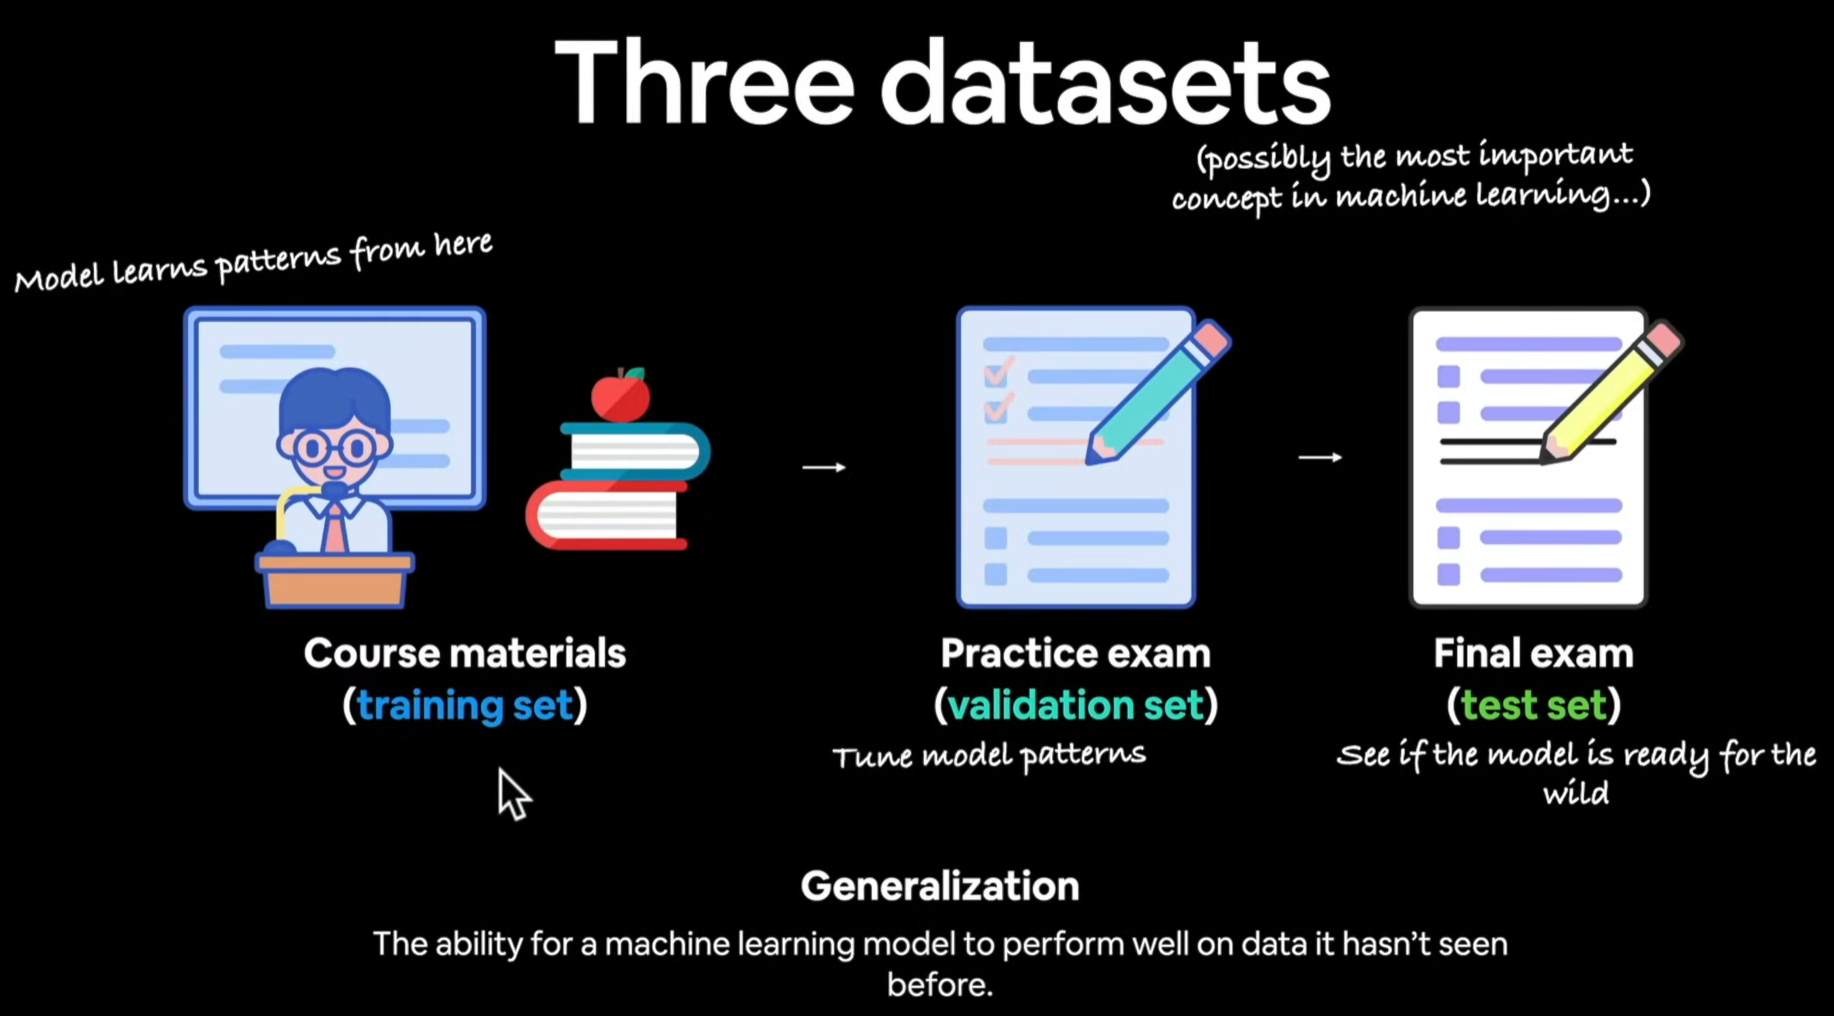


In [24]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize data

In [28]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  '''
    Plots training data, test data and compares predictions.
  '''
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Check if there are predictions
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="o", s=4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14})

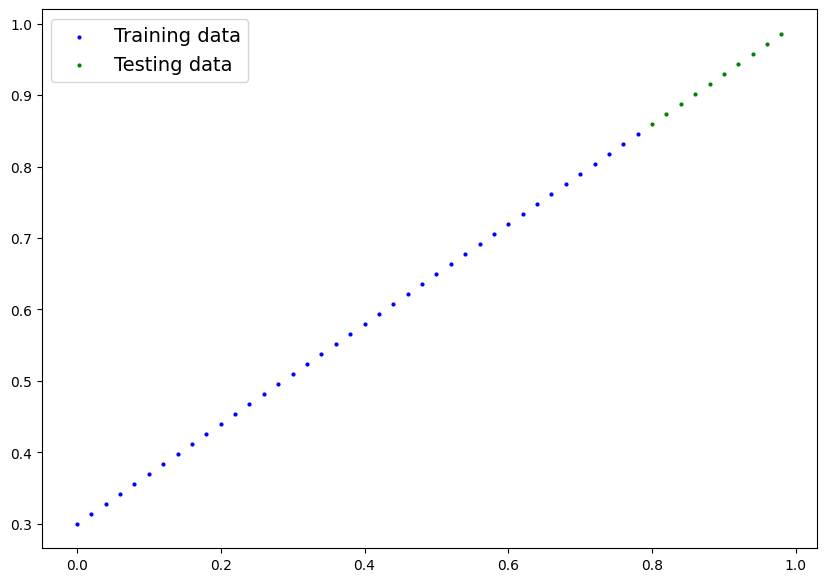

In [29]:
plot_predictions()